# network diagram


In [21]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy import stats


plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [22]:
df = fix_data(df, drop_zeros=False)

In [23]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [24]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

# WANT the scores for timelines, the scores for each QUESTION, familiarity with each alignment concept, familiarity with empirical ML, when should we build?

In [25]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

# replace the qualitative data with the quantitative data

In [26]:
df['Q3_1'].value_counts().sort_index()

Know a fair amount    23
Know a little         13
Know it well          50
Name: Q3_1, dtype: int64

In [27]:
timelines_positions = {
    "We should develop more powerful and more general systems as fast as possible": 5,
    "Soon, but not as fast as possible": 3.75,
    "Eventually, but not soon.": 2.5,
    "We should never build AGI": 1.25
}

agreement_swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

familiarity_swaps = {
    "Never heard of it": 1,
    "Heard of it": 2,
    "Know a little": 3,
    "Know a fair amount": 4,
    "Know it well": 5,
}

pre_questions = [f'Q6_{i}' for i in range(1, 10)]
familiarity_questions = [f'Q3_{i}' for i in range(1, 4)]
alignment_familiarity_questions = [f'Q4_{i}' for i in range(1, 5)]
timelines_questions = "Q5"


In [28]:
# get just the df of the questions we care about
df = df[pre_questions + familiarity_questions + alignment_familiarity_questions +  [timelines_questions]]
# df = df[pre_questions + [timelines_questions]]

In [29]:
# replace the strings with numbers
df = df.replace({
    **agreement_swaps,
    **familiarity_swaps,
    **timelines_positions,
})

df

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q4_1,Q4_2,Q4_3,Q4_4,Q5
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,3.0,2.0,1.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# rename columns Q6_1 -> Q6_9 to "agreement_x"
df = df.rename(columns={k: f"agreement_{i}" for i, k in enumerate(pre_questions, 1)})

# rename columns Q3_1 -> Q3_3 to "familiarity_x"
df = df.rename(columns={k: f"familiarity_{i}" for i, k in enumerate(familiarity_questions, 1)})

# rename columns Q4_1 -> Q4_4 to "alignment_x"
df = df.rename(columns={k: f"alignment_{i}" for i, k in enumerate(alignment_familiarity_questions, 1)})

# rename Q5 to "timelines"
df = df.rename(columns={timelines_questions: "timelines"})

In [31]:
df.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'alignment_1', 'alignment_2', 'alignment_3', 'alignment_4',
       'timelines'],
      dtype='object')

In [32]:
# drop the rows with NaN
df = df.dropna()
df

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,alignment_1,alignment_2,alignment_3,alignment_4,timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,3.75
100,5.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,1.25
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,3.0,2.0,1.0,1.0,5.00


In [33]:
# make a correlation matrix
corr = df.corr()

In [34]:
corr

,agreement_1,agreement_2,agreement_3,agreement_4,agreement_5,agreement_6,agreement_7,agreement_8,agreement_9,familiarity_1,familiarity_2,familiarity_3,alignment_1,alignment_2,alignment_3,alignment_4,timelines
agreement_1,1.000000,-0.005166,-0.313766,0.221374,0.331513,0.230755,-0.287302,0.299694,-0.244608,0.197432,0.230830,0.208287,-0.089539,-0.272186,-0.136741,-0.011493,0.090855
agreement_2,-0.005166,1.000000,0.125002,-0.076401,-0.237088,-0.172930,0.326589,0.046617,0.107865,-0.068511,0.171893,-0.073315,-0.023520,0.119472,0.066707,0.112756,-0.040233
agreement_3,-0.313766,0.125002,1.000000,0.013704,-0.034143,-0.046094,0.174299,0.079469,0.084881,-0.161909,-0.115639,-0.123525,-0.045934,0.240925,0.135891,0.039442,0.029439
agreement_4,0.221374,-0.076401,0.013704,1.000000,0.463062,0.418361,-0.018712,-0.152006,-0.038145,0.153567,0.122498,0.033165,-0.112858,-0.181108,-0.192520,-0.116757,0.028849
agreement_5,0.331513,-0.237088,-0.034143,0.463062,1.000000,0.655633,-0.223534,-0.023160,-0.138537,0.086674,0.061441,0.065975,-0.103275,-0.212554,-0.233049,-0.225995,0.306709
agreement_6,0.230755,-0.172930,-0.046094,0.418361,0.655633,1.000000,-0.262518,-0.054194,-0.293925,0.220134,0.031725,0.053144,-0.119116,-0.250714,-0.304825,-0.104666,0.253310
agreement_7,-0.287302,0.326589,0.174299,-0.018712,-0.223534,-0.262518,1.000000,0.049621,0.274273,-0.083249,0.120282,-0.104462,0.037964,0.215934,0.172085,0.183766,-0.212192
agreement_8,0.299694,0.046617,0.079469,-0.152006,-0.023160,-0.054194,0.049621,1.000000,-0.058687,-0.018718,0.057306,0.049685,-0.107069,0.032843,0.057444,0.078068,0.236042
agreement_9,-0.244608,0.107865,0.084881,-0.038145,-0.138537,-0.293925,0.274273,-0.058687,1.000000,-0.042031,-0.058254,-0.003448,-0.055983,0.056483,0.092733,0.004860,-0.185231
familiarity_1,0.197432,-0.068511,-0.161909,0.153567,0.086674,0.220134,-0.083249,-0.018718,-0.042031,1.000000,0.600556,0.391326,0.156405,0.106696,0.092794,0.053319,0.016290


In [35]:
type(corr)

pandas.core.frame.DataFrame

In [36]:
corr.columns

Index(['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4',
       'agreement_5', 'agreement_6', 'agreement_7', 'agreement_8',
       'agreement_9', 'familiarity_1', 'familiarity_2', 'familiarity_3',
       'alignment_1', 'alignment_2', 'alignment_3', 'alignment_4',
       'timelines'],
      dtype='object')

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

def plot_correlation_network_clusters(
    correlation_matrix, 
    relabels=None, 
    threshold=0.25, 
    figsize=(10,10),  # Made square by default
    sizes={'small_size': 10, 'medium_size': 14, 'large_size': 18},
    nodes_to_include_1=None,
    nodes_to_include_2=None,
    nodes_to_include_3=None
):
    """
    Create a publication-quality network visualization with three variable-sized clusters.
    
    Args:
        correlation_matrix (pd.DataFrame): Correlation matrix
        relabels (dict): Dictionary mapping original labels to new labels
        threshold (float): Minimum absolute correlation to show edge
        figsize (tuple): Figure size in inches (width, height)
        sizes (dict): Dictionary with keys 'small_size', 'medium_size', 'large_size' 
                     for consistent font sizing
        nodes_to_include_1 (set): Set of node names to include in first cluster
        nodes_to_include_2 (set): Set of node names to include in second cluster
        nodes_to_include_3 (set): Set of node names to include in third cluster
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')  # Force circular aspect ratio
    
    # Set white background
    ax.set_facecolor('white')
    fig.set_facecolor('white')
    
    # Create network
    G = nx.Graph()
    
    # Set defaults if None
    all_nodes = set(correlation_matrix.columns)
    if nodes_to_include_1 is None:
        nodes_to_include_1 = set(list(all_nodes)[:len(all_nodes)//3])
    if nodes_to_include_2 is None:
        nodes_to_include_2 = set(list(all_nodes)[len(all_nodes)//3:2*len(all_nodes)//3])
    if nodes_to_include_3 is None:
        nodes_to_include_3 = set(list(all_nodes)[2*len(all_nodes)//3:])
    
    # Create node lists for each cluster
    nodes_1 = [node for node in correlation_matrix.columns if node in nodes_to_include_1]
    nodes_2 = [node for node in correlation_matrix.columns if node in nodes_to_include_2]
    nodes_3 = [node for node in correlation_matrix.columns if node in nodes_to_include_3]
    
    # Add all nodes to graph
    all_nodes = nodes_1 + nodes_2 + nodes_3
    G.add_nodes_from(all_nodes)
    
    if len(all_nodes) == 0:
        raise ValueError("No nodes to display. Check nodes_to_include parameters.")
    
    # Calculate positions for variable-sized clusters
    def get_cluster_positions(nodes, center_x, radius=None):
        n = len(nodes)
        if n == 0:
            return {}
        # Adjust radius based on number of nodes
        if radius is None:
            radius = 0.2 if n == 1 else 0.3 + (n * 0.02)
            
        return {
            node: (center_x + radius * np.cos(2*np.pi*i/n), 
                  radius * np.sin(2*np.pi*i/n))
            for i, node in enumerate(nodes)
        }
    
    # Calculate radii for each cluster
    def get_radius(n):
        return 0.2 if n == 1 else 0.3 + (n * 0.02)
    
    r1 = get_radius(len(nodes_1)) if nodes_1 else 0
    r2 = get_radius(len(nodes_2)) if nodes_2 else 0
    r3 = get_radius(len(nodes_3)) if nodes_3 else 0
    
    # Position clusters with reduced spacing
    x1 = -(r1 + r2 + 0.2)  # Start leftmost cluster
    x2 = 0                # Center cluster
    x3 = (r2 + r3 + 0.2)  # End rightmost cluster
    
    # Generate positions for each cluster
    pos_1 = get_cluster_positions(nodes_1, x1, r1)
    pos_2 = get_cluster_positions(nodes_2, x2, r2)
    pos_2 = {node: (x, y - 0.5) for node, (x, y) in get_cluster_positions(nodes_2, x2, r2).items()}  # -0.5 moves it down
    pos_3 = get_cluster_positions(nodes_3, x3, r3)
    # pos_3 = {node: (x, y - 0.5) for node, (x, y) in get_cluster_positions(nodes_3, x3, r3).items()}  # -0.5 moves it down

    
    # Combine all positions
    pos = {**pos_1, **pos_2, **pos_3}
    
    # Define node colors based on groups
    priority_ai = {'agreement_1', 'agreement_5', 'agreement_9'}
    technical_ai = {'agreement_3', 'agreement_4', 'agreement_6', 'agreement_7'}

    tool_ai = {'agreement_4', 'agreement_5', 'agreement_6', 'timelines'}
    autonomous_ai = {'agreement_7', 'agreement_9'}
    
    node_colors = []
    for node in all_nodes:
        if node in tool_ai:
            node_colors.append('#add8e6')  # Light blue
        elif node in autonomous_ai:
            node_colors.append('#ffcba4')  # Light orange
        else:
            node_colors.append('#d3d3d3')  # Light gray
    
    # Add edges above threshold
    for i, node1 in enumerate(all_nodes):
        for node2 in all_nodes[i+1:]:
            corr = correlation_matrix.loc[node1, node2]
            if abs(corr) >= threshold:
                G.add_edge(node1, node2, 
                          weight=abs(corr),
                          color='blue' if corr > 0 else 'red')
    
    # Draw network
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors,
                          node_size=1000,
                          alpha=0.7)
    
        # In the edge creation section, save the correlation values:
    edge_labels = {}  # Add this where edges are created
    for i, node1 in enumerate(all_nodes):
        for node2 in all_nodes[i+1:]:
            corr = correlation_matrix.loc[node1, node2]
            if abs(corr) >= threshold:
                G.add_edge(node1, node2, 
                          weight=abs(corr),
                          color='blue' if corr > 0 else 'red')
                edge_labels[(node1, node2)] = f'{corr:.2f}'  # Add this line

    # After drawing edges, add:
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=sizes['small_size'],
        bbox=dict(alpha=0.1, color='white')  # Optional: adds a semi-transparent background to labels
    )
    
    # Draw edges
    edges = G.edges()
    edge_colors = [G[u][v]['color'] for u, v in edges]
    edge_weights = [G[u][v]['weight'] * 3 for u, v in edges]
    
    nx.draw_networkx_edges(G, pos,
                          edge_color=edge_colors,
                          width=edge_weights,
                          alpha=0.5)
    
    # Add labels
    if relabels is None:
        labels = {node: node for node in all_nodes}
    else:
        labels = {node: relabels.get(node, node) for node in all_nodes}
    
    nx.draw_networkx_labels(G, pos, labels,
                           font_size=sizes['medium_size'])
    
    # Add legend
    legend_elements = [
        Line2D([0], [0], color='blue', lw=2, label='Positive correlation'),
        Line2D([0], [0], color='red', lw=2, label='Negative correlation'),
        plt.scatter([], [], c='#add8e6', label='Tool AI beliefs'),
        plt.scatter([], [], c='#ffcba4', label='AI-as-an-agent beliefs'),
        plt.scatter([], [], c='#d3d3d3', label='Familiarity with Alignment')
    ]
    
    ax.legend(handles=legend_elements, 
             loc='center left',
             bbox_to_anchor=(1, 0.5),
             fontsize=sizes['small_size'])
     
    plt.title('AI Safety Belief Correlation Network\n', 
             fontsize=sizes['large_size'],
             pad=20)
    
    plt.tight_layout()
    
    return fig, ax

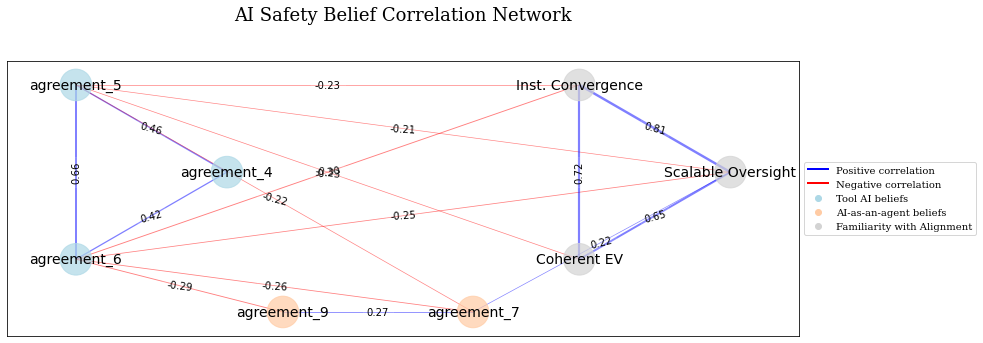

In [42]:
fig, ax = plot_correlation_network_clusters(
    corr,
    # relabels={'agreement_1': 'AGI timeline concerns'},
    relabels={
        # 'alignment_1': 'Alignment Problem',
        'alignment_2': 'Scalable Oversight',
        'alignment_3': 'Inst. Convergence',
        'alignment_4': 'Coherent EV',
    },
    threshold=0.2,
    figsize=(14, 7),
    nodes_to_include_1={'agreement_4', 'agreement_5', 'agreement_6'},
    # nodes_to_include_2={'agreement_4', 'agreement_5', 'agreement_6'},
    # nodes_to_include_2={},
    nodes_to_include_2={"agreement_7", "agreement_9"},
    nodes_to_include_3={'alignment_2', 'alignment_3', 'alignment_4'},
)
plt.show()